In [3]:
pip install kaggle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/

In [6]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip '/content/dogs-vs-cats.zip'

Archive:  /content/dogs-vs-cats.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [8]:
!unzip '/content/train.zip'
!unzip '/content/test1.zip'

Archive:  /content/train.zip
replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/test1.zip
replace test1/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [1]:
import numpy as np
import pandas as pd

In [2]:
train_dir = '/content/train'
test_dir = '/content/test1'

In [3]:
import os

train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

train_count = 0
test_count = 0

for files in train_files:
  train_count += 1

for files in test_files:
  test_count += 1
# printing no of images in train and test set
print(f"no of images in train_dir is :{train_count} \nand in test_dir is :{test_count}")

no of images in train_dir is :25000 
and in test_dir is :12500


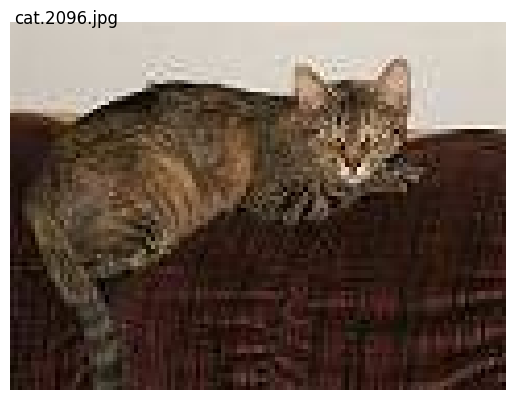

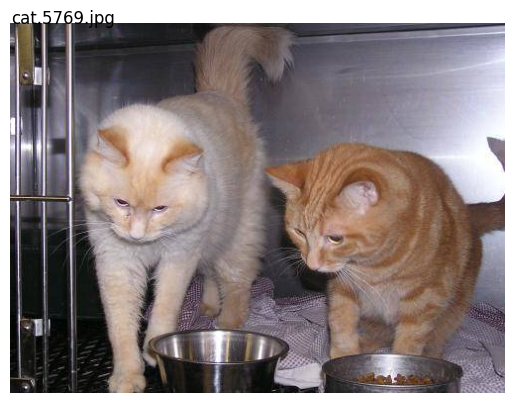

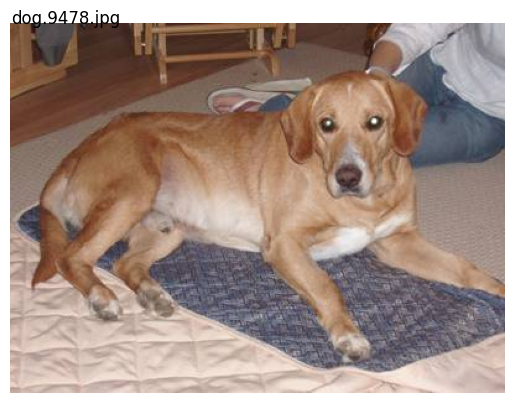

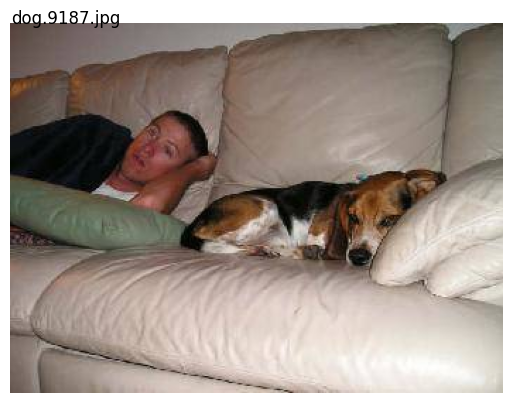

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# displaying the images of train dataset

n_images = 4

for i in range(n_images):
  img_path = os.path.join(train_dir,train_files[i])
  img = Image.open(img_path)

  # showing the file names
  file_name = os.path.basename(img_path)
  plt.text(0.5,-0.1,file_name, fontsize = 12,)

  plt.imshow(img)
  plt.axis('off')
  plt.show()

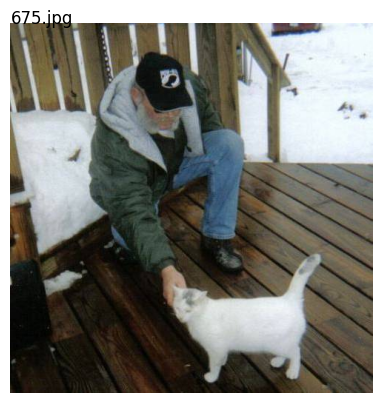

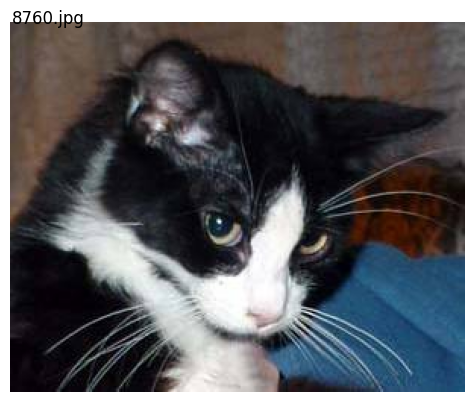

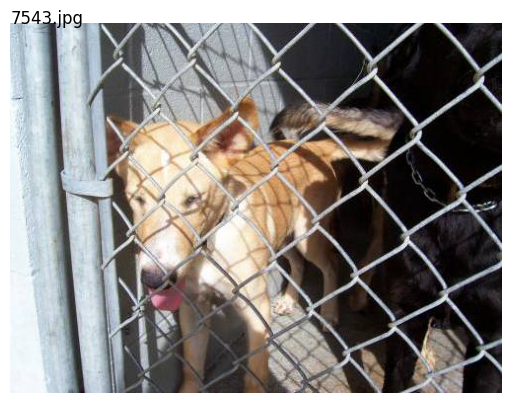

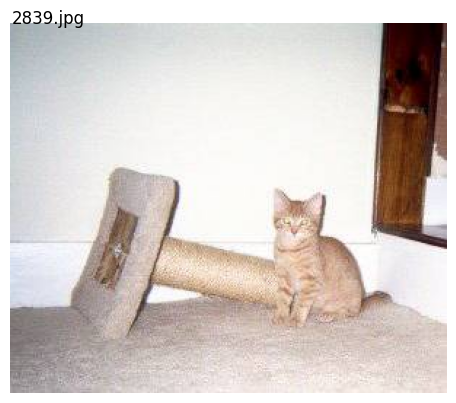

In [5]:
# displaying the images of test set

for i in range(n_images):
  img_path = os.path.join(test_dir, test_files[i])
  img = Image.open(img_path)

  # showing the filenames
  file_names = os.path.basename(img_path)
  plt.text(0.5,-0.1,file_names,fontsize = 12)

  plt.imshow(img)
  plt.axis('off')
  plt.show()

# Preprocessing the images

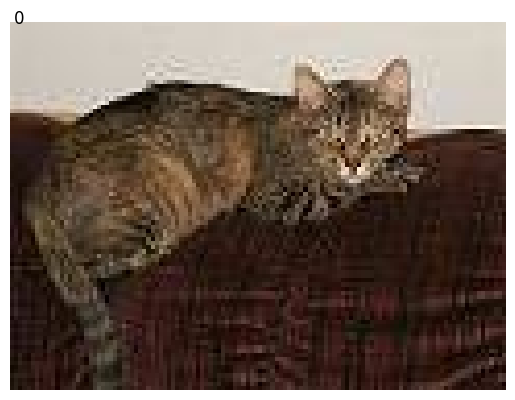

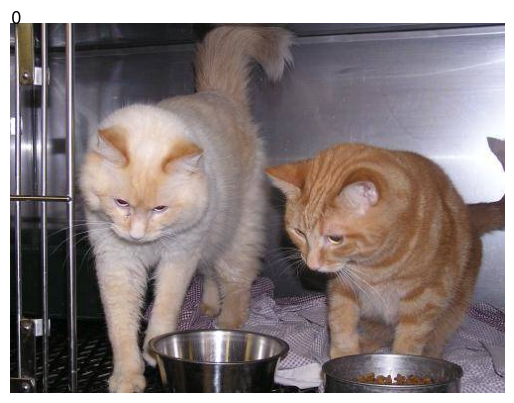

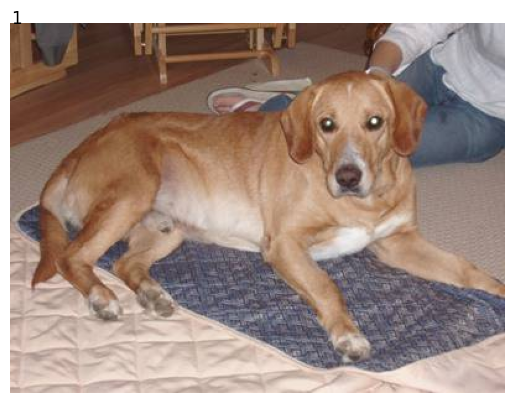

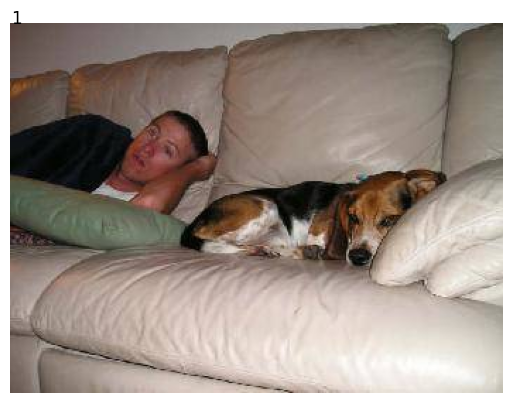

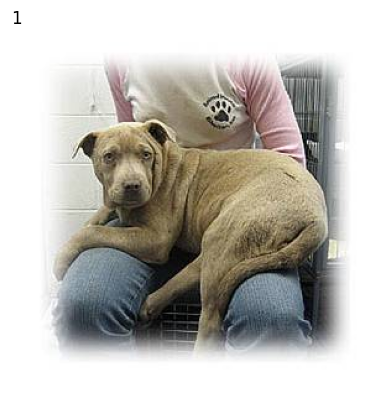

In [6]:
# labeling cat to 0 and dog to 1

for files in train_files[:5]:
  if files.startswith('cat'):
    class_num = 0
  elif files.startswith('dog'):
    class_num = 1
  else:
    continue

# showing images with respective classes 0 and 1

  img_path = os.path.join(train_dir, files)
  img = Image.open(img_path)

  plt.text(0.5, -0.1, class_num, fontsize=12)

  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [14]:
data = []

for files in train_files[:5000]:
  if files.startswith('cat'):
    class_num = 0
  elif files.startswith('dog'):
    class_num = 1
  else:
    continue

  img_path = os.path.join(train_dir, files)

  # resizing the image to consistent size(128x128 pixels)

  img = Image.open(img_path)
  img = img.resize((128,128))

  # converting image to grayscale
  img = img.convert('L')

  # converting image to array

  img_arr = np.array(img).flatten()

  data.append([img_arr, class_num])

In [15]:
# splitting the data in X and y

X = []
y = []

for feature,label in data:
  X.append(feature)
  y.append(label)

X = np.array(X)
y = np.array(y)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 777)

# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training

In [21]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C = 1.0)

model.fit(X_train,y_train)

SVC()

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print(f"Accuracy :{accuracy}")
print("confusion matrix")
print(classification)